In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits

In [26]:
ulx_file = '../data/external/Earnshaw_ULX_cat/earnshaw_Xraycatalogue.fits'
with fits.open(ulx_file) as hdul:
    #hdul.info()
    data = pd.DataFrame(hdul[1].data)

In [27]:
data

,DETID,SRCID,DR3SRCID,DR3DETID,DR3DETDIST,DR3SRCDIST,DR3MULT,IAUNAME,SRC_NUM,OBS_ID,...,EP_8_LUMINOSITY_MAX,IN_CP02,IN_S04,IN_LB05,IN_LM05,IN_S11,IN_W11,IS_COMPLETE_38,IS_COMPLETE_39,IS_COMPLETE_40
0,382,118684,156,156,3.412370,3.412370,1,3XMM J000155.3-152551,26,0204790101,...,3.706074e+36,False,False,False,False,False,False,True,True,True
1,396,118656,163,163,1.785300,1.785300,1,3XMM J000158.1-152758,3,0204790101,...,9.236017e+36,False,False,False,False,False,False,True,True,True
2,410,118560,170,170,0.752346,0.752346,1,3XMM J000201.4-153034,8,0204790101,...,6.361064e+36,False,False,False,False,False,False,True,True,True
3,430,118540,178,178,2.738700,2.738700,1,3XMM J000205.0-152504,9,0204790101,...,6.028317e+36,False,False,False,False,False,False,True,True,True
4,5169,122027,2335,2497,1.099720,1.099720,1,3XMM J002012.0+591756,79,0152260101,...,7.193321e+35,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,525383,43541,189988,-2147483648,NaN,2.288190,2,3XMM J233843.6-562849,25,0677770133,...,1.031139e+41,False,False,False,False,False,True,False,False,False
2135,525632,236202,190090,245060,1.201990,1.201990,1,3XMM J234000.7-121708,18,0055990301,...,1.107447e+39,False,False,False,False,False,True,False,False,False
2136,527019,241323,-2147483648,-2147483648,NaN,NaN,-32768,3XMM J234420.0+095548,24,0301651001,...,4.331900e+39,False,False,False,False,False,False,False,True,True
2137,529799,239871,191027,246016,0.586219,0.586219,1,3XMM J235122.5+200638,9,0093190301,...,1.188354e+40,False,False,False,False,False,True,False,False,True


In [29]:
# Filter to only include ULXs
data = data[data['EP_8_LUMINOSITY_MAX'] >1E39]

In [30]:
#Sources with more than 1 obervation
sources = data['SRCID'].value_counts()[data['SRCID'].value_counts() > 1].sort_values(ascending=False)
sources

894      13
1915     11
2049     10
2231     10
4349      7
         ..
29739     2
29749     2
32833     2
29790     2
34447     2
Name: SRCID, Length: 81, dtype: int64

In [31]:
src901 = data[data['SRCID'] == 901].sort_values(by=['MJD_START'])
src901

,DETID,SRCID,DR3SRCID,DR3DETID,DR3DETDIST,DR3SRCDIST,DR3MULT,IAUNAME,SRC_NUM,OBS_ID,...,EP_8_LUMINOSITY_MAX,IN_CP02,IN_S04,IN_LB05,IN_LM05,IN_S11,IN_W11,IS_COMPLETE_38,IS_COMPLETE_39,IS_COMPLETE_40
622,87552,901,29246,-2147483648,NaN,0.092017,16,3XMM J031818.4-663002,5,0150280201,...,1.100506e+39,False,False,True,False,False,False,False,False,False
618,87537,901,29246,37100,0.739589,0.092017,16,3XMM J031818.4-663002,4,0150280501,...,1.040845e+39,False,False,True,False,False,False,False,False,False
623,87542,901,29246,-2147483648,NaN,0.092017,16,3XMM J031818.4-663002,4,0150280701,...,1.151833e+39,False,False,True,False,False,False,False,False,False
619,87538,901,29246,37101,0.642394,0.092017,16,3XMM J031818.4-663002,4,0150281101,...,1.086083e+39,False,False,True,False,False,False,False,False,False
610,87543,901,29246,37106,0.506371,0.092017,16,3XMM J031818.4-663002,4,0205230501,...,1.086528e+39,False,False,True,False,False,False,False,False,False


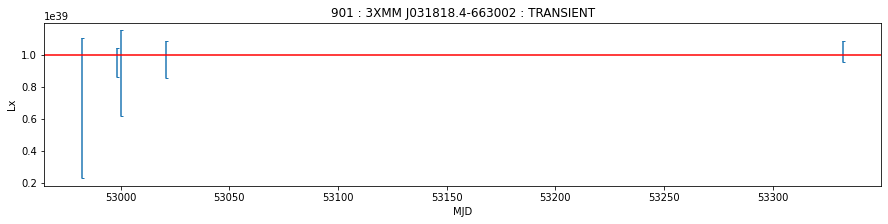

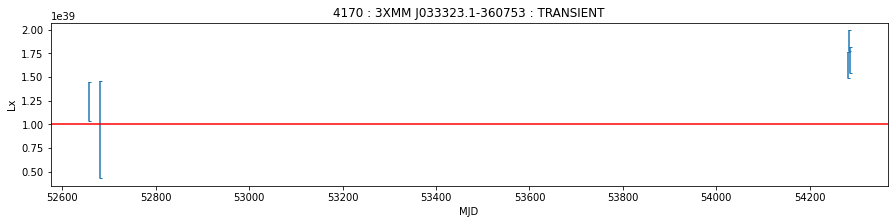

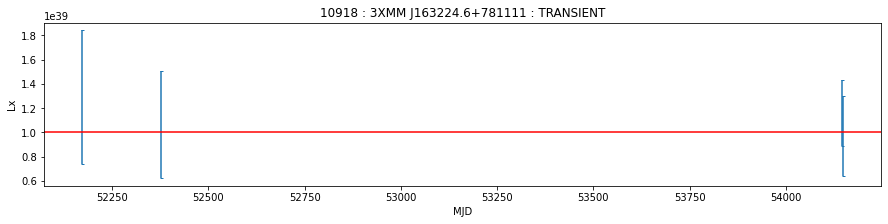

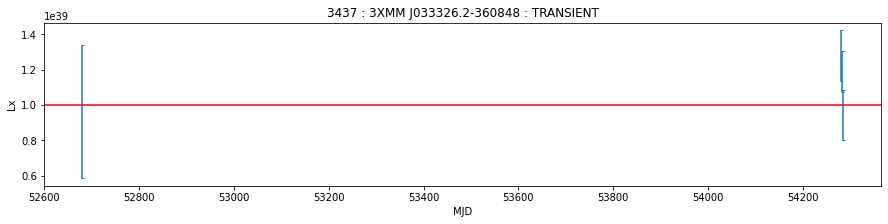

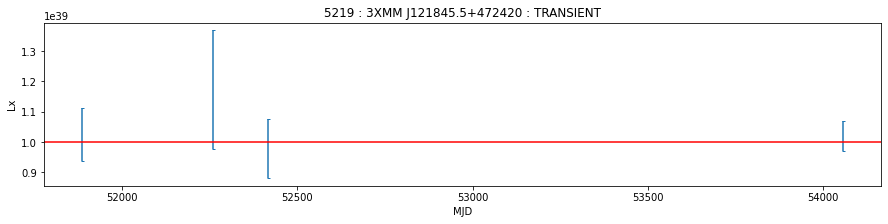

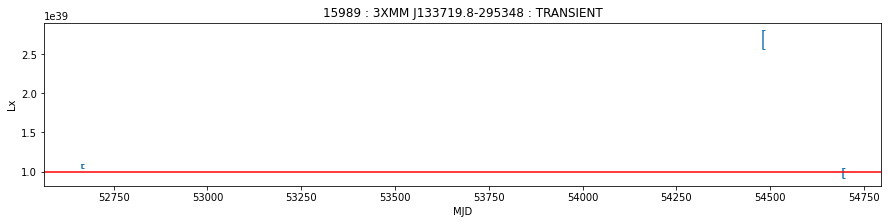

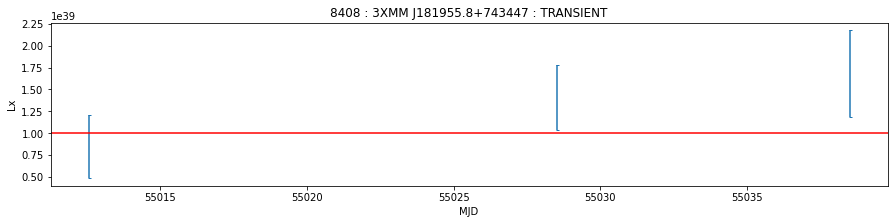

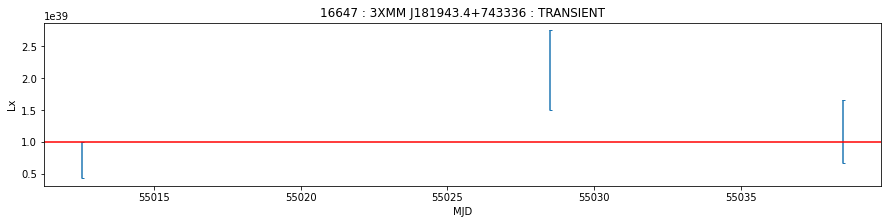

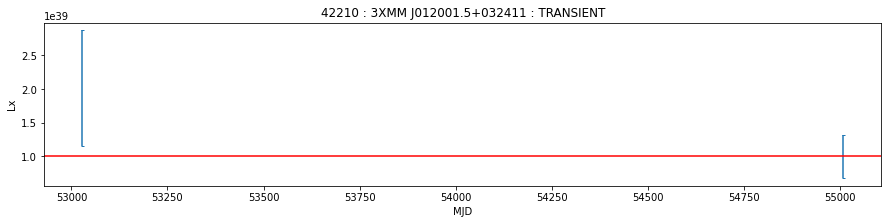

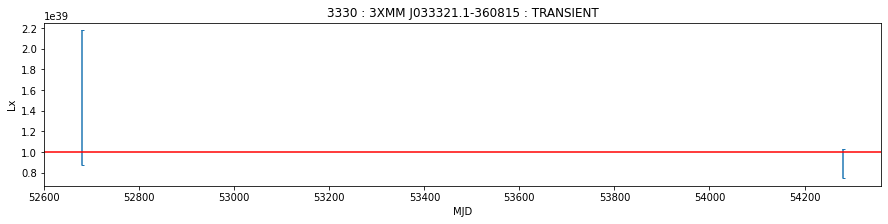

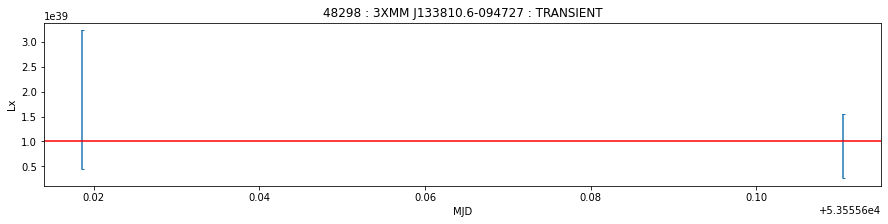

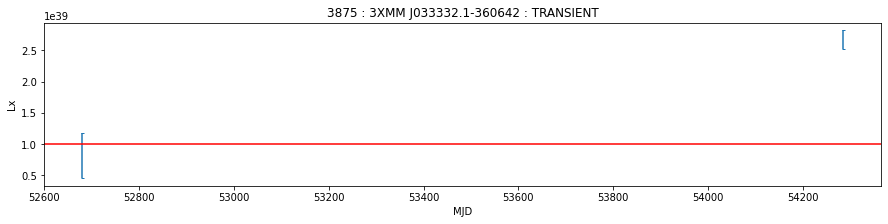

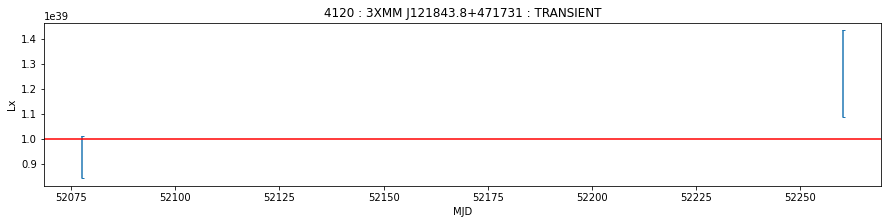

In [32]:
number_of_transients = 0
number_of_dead = 0
number_of_alive = 0
flux_limit = 1E39

for source in sources.index:
    subset = data[data['SRCID'] == source].sort_values(by=['MJD_START'])
    if max(subset['EP_8_LUMINOSITY']) > flux_limit and min(subset['EP_8_LUMINOSITY']) < flux_limit: #TRANSIENT
        plt.figure(figsize=(15,3))
        plt.ylabel('Lx')
        plt.xlabel('MJD')
        plt.title(str(subset['SRCID'].unique()[0]) + ' : ' + subset['IAUNAME'].unique()[0] + ' : TRANSIENT')
        plt.errorbar(subset['MJD_START'], subset['EP_8_LUMINOSITY'], yerr=subset['EP_8_LUMINOSITY_ERR'], fmt='none', capsize=1.5)
        plt.axhline(flux_limit, c='red')
        number_of_transients+=1
    elif max(subset['EP_8_LUMINOSITY_MAX']) < flux_limit: #DEAD
        number_of_dead+=1
    elif min(subset['EP_8_LUMINOSITY'] - subset['EP_8_LUMINOSITY_ERR']) > flux_limit: #Alive
        number_of_alive+=1

In [33]:
# Monte carlo simulation on the obtained lightcurves to deduce
# To what degree we can characterise a lightcurve as being
# Alive/dead/transient
MC_ITERATIONS = 100000

results_list = []

for source in sources.index:
    results = {}
    alive = 0
    dead = 0
    transient = 0
    print(f'Doing source: {source}')
    subset = data[data['SRCID'] == source].sort_values(by=['MJD_START'])
    simulated_luminosities = []
    
    for index, row in subset.iterrows():
        # print(f"index: {index} ep 8 luminosity: {row['EP_8_LUMINOSITY']}, err: {row['EP_8_LUMINOSITY_ERR']}")
        sample = np.random.normal(loc=row['EP_8_LUMINOSITY'], scale=row['EP_8_LUMINOSITY_ERR'], size=MC_ITERATIONS)
        simulated_luminosities.append(sample)
    
    for i in (np.array(simulated_luminosities).T):
        # print(f'out of {len(i)} points:')
        number_above = len(i[i > 1E39])
        number_below = len(i[i < 1E39])
        if number_below == 0:
            #print('alive')
            alive+=1
        elif number_above == 0:
            #print('dead')
            dead+=1
        else:
            #print(f'transient {number_above}, {number_below}')
            transient+=1
            
    results['SRCID'] = source
    results['alive'] = alive
    results['dead'] = dead
    results['transient'] = transient
    results_list.append(results)

Doing source: 894
Doing source: 1915
Doing source: 2049
Doing source: 2231
Doing source: 4349
Doing source: 5218
Doing source: 6996
Doing source: 901
Doing source: 3129
Doing source: 8508
Doing source: 4170
Doing source: 10333
Doing source: 14633
Doing source: 10918
Doing source: 10328
Doing source: 3374
Doing source: 3437
Doing source: 13415
Doing source: 10388
Doing source: 5219
Doing source: 15989
Doing source: 16088
Doing source: 17098
Doing source: 4101
Doing source: 16342
Doing source: 5231
Doing source: 16021
Doing source: 15621
Doing source: 4934
Doing source: 16132
Doing source: 8408
Doing source: 19949
Doing source: 16647
Doing source: 28571
Doing source: 35311
Doing source: 7245
Doing source: 35286
Doing source: 28451
Doing source: 28943
Doing source: 43541
Doing source: 21337
Doing source: 51071
Doing source: 17151
Doing source: 3277
Doing source: 42210
Doing source: 3330
Doing source: 5412
Doing source: 28995
Doing source: 58403
Doing source: 30058
Doing source: 48298
Doin

In [34]:
MC_results = pd.DataFrame(results_list)
MC_results['classification'] = MC_results[['alive','dead', 'transient']].idxmax(axis=1)
MC_results['confidence'] = MC_results[['alive','dead', 'transient']].max(axis=1)/MC_ITERATIONS
MC_results['confidence_squared'] = MC_results['confidence']**2
# https://faraday.physics.utoronto.ca/PVB/Harrison/ErrorAnalysis/Propagation.html

In [35]:
MC_results.sort_values(by='confidence')

,SRCID,alive,dead,transient,classification,confidence,confidence_squared
65,51654,44310,10199,45491,transient,0.45491,0.206943
60,35211,45644,8927,45429,alive,0.45644,0.208337
61,28876,46453,8576,44971,alive,0.46453,0.215788
43,3277,48748,6977,44275,alive,0.48748,0.237637
44,42210,44116,5962,49922,transient,0.49922,0.249221
...,...,...,...,...,...,...,...
33,28571,100000,0,0,alive,1.00000,1.000000
47,28995,100000,0,0,alive,1.00000,1.000000
37,28451,100000,0,0,alive,1.00000,1.000000
14,10328,100000,0,0,alive,1.00000,1.000000


In [36]:
number_of_alive = len(MC_results[MC_results['classification'] == 'alive'])
number_of_alive_err = np.sqrt(MC_results[MC_results['classification'] == 'alive']['confidence_squared'].sum())
number_of_transients = len(MC_results[MC_results['classification'] == 'transient'])
number_of_transients_err = np.sqrt(MC_results[MC_results['classification'] == 'transient']['confidence_squared'].sum())
number_of_dead = len(MC_results[MC_results['classification'] == 'dead'])
number_of_dead_err = np.sqrt(MC_results[MC_results['classification'] == 'dead']['confidence_squared'].sum())


#The total number here is defined only for the alive and transient systems
number_total = number_of_alive + number_of_transients
number_total_err = np.sqrt(number_of_alive_err**2 + number_of_transients_err**2)

percent_of_alive = number_of_alive / (number_total)
percent_of_transients = number_of_transients / (number_total)
percent_of_alive_err = percent_of_alive * np.sqrt((number_total_err/number_total)**2 +  (number_of_alive_err/number_of_alive)**2)
percent_of_transients_err = percent_of_transients * np.sqrt((number_total_err/number_total)**2 +  (number_of_transients_err/number_of_transients)**2)

In [37]:
print(f'Number of alive systems: {number_of_alive} +- {number_of_alive_err}')
print(f'Number of transient systems: {number_of_transients} +- {number_of_transients_err}')
print(f'Number of dead systems: {number_of_dead} +- {number_of_dead_err}')
print(f'% of alive systems: {percent_of_alive} +- {percent_of_alive_err}')
print(f'% of transient systems: {percent_of_transients} +- {percent_of_transients_err}')

Number of alive systems: 67 +- 7.452910803632364
Number of transient systems: 14 +- 2.706010895876068
Number of dead systems: 0 +- 0.0
% of alive systems: 0.8271604938271605 +- 0.12256472421344072
% of transient systems: 0.1728395061728395 +- 0.03744750536124969


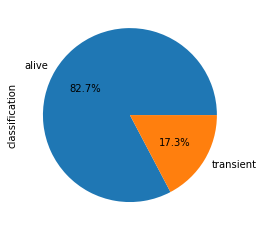

In [38]:
MC_results['classification'].value_counts().plot(kind='pie', autopct='%1.1f%%')

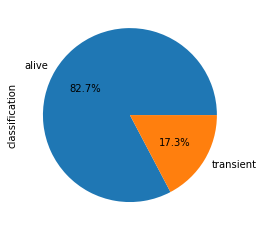

In [39]:
MC_results = MC_results[MC_results['classification'].isin(['transient', 'alive'])]
MC_results['classification'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# Non - MC classification

In [40]:
print(f'Objects in Earnshaw cat: {len(data["SRCID"].unique())}')
print(f'Objects with more than 1 observation: {len(sources)}')
print(f'Number of Transient ULXs: {number_of_transients}')
print(f'Number of alive ULXs: {number_of_alive}')
print(f'Number of dead ULXs: {number_of_dead}')

Objects in Earnshaw cat: 384
Objects with more than 1 observation: 81
Number of Transient ULXs: 14
Number of alive ULXs: 67
Number of dead ULXs: 0


([<matplotlib.patches.Wedge at 0x7f01eb23da58>,
 [Text(-0.9417835605766091, 0.5683693561652007, 'alive'),
  Text(0.9417835339693184, -0.5683694002532701, 'transient'),
  Text(1.0999999999999954, -1.0298943298478347e-07, 'dead')],
 [Text(-0.5137001239508776, 0.31001964881738214, '82.7%'),
  Text(0.51370010943781, -0.31001967286542, '17.3%'),
  Text(0.5999999999999974, -5.617605435533643e-08, '0.0%')])

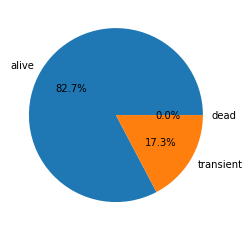

In [41]:
plt.pie([number_of_alive, number_of_transients, number_of_dead], labels=['alive', 'transient', 'dead',], autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7f01eb277fd0>,
 [Text(-0.9417835605766091, 0.5683693561652007, 'alive'),
  Text(0.9417835339693184, -0.5683694002532701, 'transient')],
 [Text(-0.5137001239508776, 0.31001964881738214, '82.7%'),
  Text(0.51370010943781, -0.31001967286542, '17.3%')])

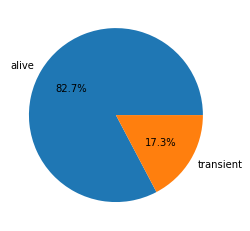

In [42]:
plt.pie([number_of_alive, number_of_transients], labels=['alive', 'transient'], autopct='%1.1f%%')